## Task1:Develop A neural Network That Can Read Handwriting
## Name:Rutuja Aher

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

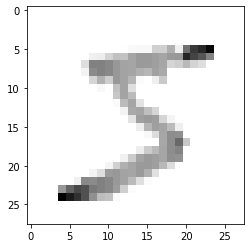

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
model=Sequential()

##1st
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##2nd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##3rd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Full1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
    
##Full2
model.add(Dense(32))
model.add(Activation("relu")) 

##LastFull
model.add(Dense(10))
model.add(Activation('softmax'))           

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [14]:
print("Total Training Samples= ",len(x_trainr))

Total Training Samples=  60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.3558 - accuracy: 0.8884 - val_loss: 0.1766 - val_accuracy: 0.9481
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1146 - accuracy: 0.9645 - val_loss: 0.0838 - val_accuracy: 0.9729
Epoch 3/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.0794 - val_accuracy: 0.9759
Epoch 4/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0720 - val_accuracy: 0.9784
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0482 - accuracy: 0.9840 - val_loss: 0.0672 - val_accuracy: 0.9801


In [17]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0654 - accuracy: 0.9820
test loss on 10,000 test samples 0.06542215496301651
validation accuracy on 10,000 test samples 0.9819999933242798


In [44]:
predicions=model.predict([x_testr])

In [45]:
print(predicions)

[[3.22139993e-13 5.91609606e-09 1.87070137e-09 ... 1.00000000e+00
  5.10476938e-10 4.84064788e-09]
 [1.28577766e-03 1.03467460e-06 9.98707652e-01 ... 4.70151207e-07
  6.80938570e-07 1.31264733e-06]
 [2.10748482e-07 9.99973416e-01 4.04446695e-07 ... 7.88439229e-06
  7.74176215e-07 3.14440314e-08]
 ...
 [4.90266383e-10 3.36425699e-04 1.04264055e-08 ... 2.61165278e-05
  5.61983325e-06 8.93773085e-06]
 [1.28694285e-06 6.56324204e-08 8.03531552e-09 ... 1.89433180e-08
  7.31449472e-05 9.89995073e-08]
 [4.30629589e-05 5.27237543e-09 9.18277365e-08 ... 5.75788350e-09
  2.75949397e-08 7.41809103e-08]]


In [46]:
print(np.argmax(predicions[0]))

7


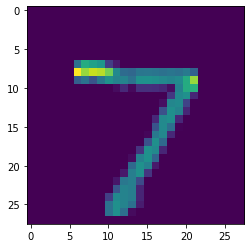

In [47]:
plt.imshow(x_test[0])

In [48]:
print(np.argmax(predicions[160]))

4


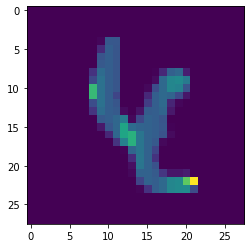

In [23]:
plt.imshow(x_test[160])

In [49]:
import cv2

In [62]:
img=cv2.imread('One.png')

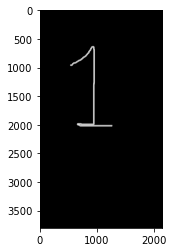

In [63]:
plt.imshow(img)

In [52]:
img.shape

(4600, 2800, 3)

In [53]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [54]:
gray.shape

(4600, 2800)

In [55]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [56]:
resized.shape

(28, 28)

In [57]:
newing=tf.keras.utils.normalize(resized,axis=1)

In [58]:
newing=np.array(newing).reshape(-1,img_size,img_size,1)

In [59]:
newing.shape

(1, 28, 28, 1)

In [60]:
predicions=model.predict(newing)

In [61]:
print(np.argmax(predicions))

1
